In [1]:
import numpy as np

In [14]:
# 二乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [42]:
# 交差エントロピー誤差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [43]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#  "2" is best match
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

#  "7" is best match
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.0975
0.5975


In [44]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#  "2" is best match
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

#  "7" is best match
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099
2.30258409299


In [45]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [46]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_size]
t_batch = t_train[batch_size]

print(batch_mask)

[44276 38203  3805 56431 25812  8143 37184 17385 56393 29502]


In [47]:
# 交差エントロピー誤差 ミニバッチ
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [48]:
# 微分 悪い例
# def numerical_diff(f, x):
#     h = 10e-50 # 丸め誤差
#     return(f(x + h) - f(x)) / h

def numerical_diff(f, x):
    h = 1e-4
    return(f(x + h) - f(x - h)) / (2 * h)

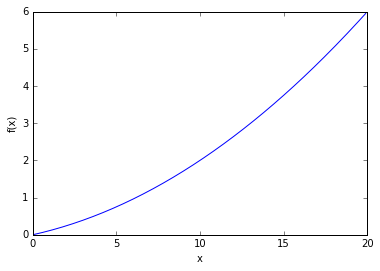

In [49]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [50]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


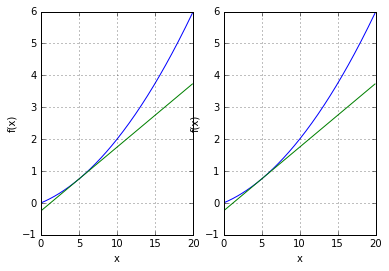

In [66]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y = function_1(x)
y2 = tf(x)

plt.subplot(1, 2, 1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.grid(True)

tf = tangent_line(function_1, 10)
y = function_1(x)

plt.subplot(1, 2, 2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y2)
plt.grid(True)

plt.show()

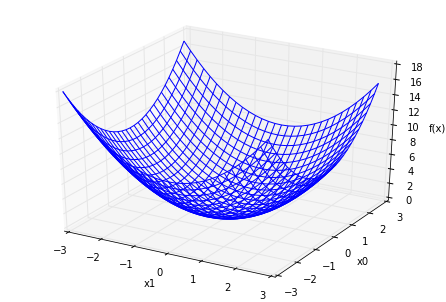

In [65]:
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)

from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-3, 3, 0.2)
x1 = np.arange(-3, 3, 0.2)
X0, X1 = np.meshgrid(x0, x1)
Y = X0 ** 2 + X1 ** 2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0, X1, Y)

ax.set_xlabel('x1')
ax.set_ylabel('x0')
ax.set_zlabel('f(x)')

plt.show()

In [69]:
# x0 = 3, x1 = 4 のときの x0 に対する偏微分
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0

print(numerical_diff(function_tmp1, 3.0))

# x0 = 3, x1 = 4 のときの x1 に対する偏微分
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


In [72]:
# 勾配
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


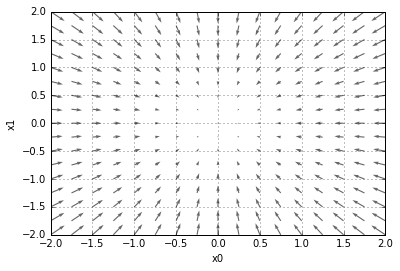

In [18]:
# f(x0, x1) = x0**2 + x1**2 の勾配
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3

import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val  -h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        
        x[idx] = tmp_val
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def target_line(f, x):
    d = numerical_dradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()
